In [62]:
from bs4 import BeautifulSoup
from chatbackend import Database
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from selenium import webdriver

In [58]:
base_url = "https://yourdoctors.online/resources/page/"
allblogs=[]
for i in range(26):
    global allblogs
    site=base_url+str(i)+"/"
    driver = webdriver.Chrome("chromedriver")
    driver.get(site)
    soup=BeautifulSoup(driver.page_source, "html.parser")
    driver.quit()
    allblogs+=soup.find_all("div", {"class":"w-blog-post-h"})

In [140]:
df = pd.DataFrame()
alltitlesdf=[]
categoriesdf=[]
tagwordsdf=[]

for post in allblogs:  
    
    titles=post.find_all("a", {"class":"entry-title"})
    alltitlesdf.append(titles[0].text)
    
    cats=post.find_all("a", {"rel":"category tag"})
    temp1=[]
    for ii in cats:
        temp1.append(ii.text)
        categoriesdf.append(temp1)
        
    tags=post.find_all("a", {"rel":"tag"})
    temp2=[]
    for ii in tags:
        temp2.append(ii.text)
        tagwordsdf.append(temp2)
     
df["title"]=pd.Series(alltitlesdf)
df["cats"]=pd.Series(categoriesdf)
df["tags"]=pd.Series(tagwordsdf)


In [141]:
categories=[]
tagwords=[]
for post in allblogs:
    cats=post.find_all("a", {"rel":"category tag"})
    for ii in cats:
        categories.append(ii.text)
    tags=post.find_all("a", {"rel":"tag"})
    for ii in tags:
        tagwords.append(ii.text)
categories=pd.Series(categories)
tagwords=pd.Series(tagwords)
tag20=tagwords.value_counts()[:20]
cat20=categories.value_counts()[:20]

![Info](https://i.imgur.com/75sunE4.png)

In [142]:
print("There are {} tag words and here are the top 5".format(len(tagwords.unique())))
print(tagwords.value_counts()[:5])
print()
print()
print("There are {} categories and here are the top 5".format(len(categories.unique())))
print(categories.value_counts()[:5])

There are 478 tag words and here are the top 5
Women's Health    257
Mental Health      63
Depression         54
Pregnancy          54
Women              42
dtype: int64


There are 51 categories and here are the top 5
Women's Health    134
Gynecologists      38
Mental Health      30
Pregnancy          27
Healthcare         23
dtype: int64


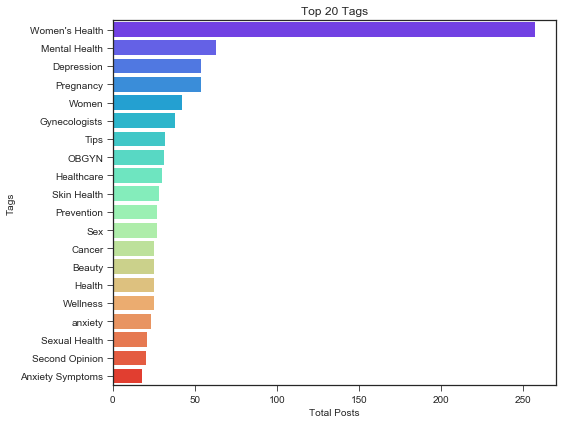

In [145]:
fig,ax=plt.subplots(figsize=(8,6))
sns.barplot(x=tag20.values, y=tag20.index, palette="rainbow")
ax.set_title("Top 20 Tags")
ax.set_xlabel("Total Posts")
ax.set_ylabel("Tags")
fig.tight_layout()

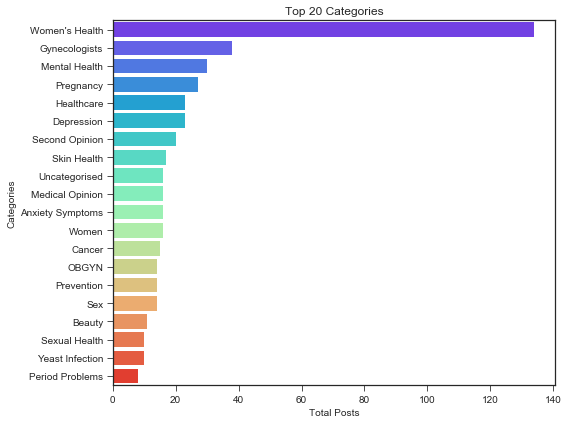

In [146]:
fig,ax=plt.subplots(figsize=(8,6))
sns.barplot(x=cat20.values, y=cat20.index, palette="rainbow")
ax.set_title("Top 20 Categories")
ax.set_xlabel("Total Posts")
ax.set_ylabel("Categories")
fig.tight_layout()